In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.neighbors import KNeighborsClassifier

import gensim
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import sys
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn import metrics
#from sklearn import preprocessingcount
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from tqdm import tqdm

import warnings
warnings.simplefilter(action='ignore', category=Warning)

from IPython.display import Audio 
from IPython.core.display import display
def mFinito():
       display(Audio('/Users/rogerrabbit/Downloads/here-we-go-mario.mp3', autoplay=True))

def _df_(x):
    return pd.DataFrame(x)


from collections import Counter

def _count(x):
    a = Counter(" ".join(x).split()).most_common(10000)
    a = _df_(a)
    return a

def _count_(x):
    a = Counter(" ".join(x).split()).most_common(10000)
    return a

def _graph_histo_(data,x,y, title, figsize, font):
    plt.figure(figsize=(figsize, figsize))
    sns.set(font_scale=font)
    ax = sns.barplot(x=x, y=y, data=a, orient='h', saturation=0.7)
    plt.xticks(rotation=80)
    plt.title(str(title), fontsize=35)
    return plt.show()


from tqdm import tqdm
import cv2


from sklearn import cluster, metrics

import time
tempsX = time.time()
def _time_():
    duration1 = time.time()-tempsX
    return print("temps de traitement       ",round(duration1/60,2), "minutes")

/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


# Import 

In [2]:
mD= pd.read_csv('flipkart.csv')
mData = mD.copy()
mData.head(2)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{, {""key""=>""Model N..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."


# Pop le relou

In [3]:
mData = mData.drop([mData.index[343]])

In [4]:
for i in range (0,7):
    mData['p_cat_%d' % i] = mData.product_category_tree.str.split('>>', expand = True)[i]

    
mData_p1 = mData[["p_cat_0","p_cat_1", "image", "description"]]

temp=mData_p1.p_cat_0.fillna("0")

mData_p1['Category'] =  pd.np.where(temp.str.contains("Home Furnishing"),"Home_Furnishing",
                        pd.np.where(temp.str.contains("Home Decor & Festive Needs"), "Home_Decor_Festive_Needs",
                        pd.np.where(temp.str.contains("Kitchen & Dining"), "Kitchen_Dining",
                        pd.np.where(temp.str.contains("Baby Care"), "Baby_Care",
                        pd.np.where(temp.str.contains("Computers"), "Computers",
                        pd.np.where(temp.str.contains("Beauty and Personal Care"), "Beauty_Personal_Care",
                        pd.np.where(temp.str.contains("Watches"), "Watches", "task")))))))

mData_p1 = mData_p1.rename(columns={"p_cat_1": "Product"})
mData_p1.Product = mData_p1.Product.str.split('"]', expand = True)[0]
mData_p1.pop('p_cat_0')
mData_p1["labels"] = LabelEncoder().fit_transform(mData_p1['Category'])

mData_p1 = mData_p1.drop(635)
mData_p1 = mData_p1.reset_index()

mData_p1

,index,Product,image,description,Category,labels
0,0,Curtains & Accessories,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...,Home_Furnishing,4
1,1,Baby Bath & Skin,7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...,Baby_Care,0
2,2,Baby Bath & Skin,64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...,Baby_Care,0
3,3,Bed Linen,d4684dcdc759dd9cdf41504698d737d8.jpg,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home_Furnishing,4
4,4,Bed Linen,6325b6870c54cd47be6ebfbffa620ec7.jpg,Key Features of Jaipur Print Cotton Floral Kin...,Home_Furnishing,4
...,...,...,...,...,...,...
1043,1045,Baby & Kids Gifts,958f54f4c46b53c8a0a9b8167d9140bc.jpg,Oren Empower Extra Large Self Adhesive Sticker...,Baby_Care,0
1044,1046,Baby & Kids Gifts,fd6cbcc22efb6b761bd564c28928483c.jpg,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby_Care,0
1045,1047,Baby & Kids Gifts,5912e037d12774bb73a2048f35a00009.jpg,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby_Care,0
1046,1048,Baby & Kids Gifts,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby_Care,0


In [5]:
import pandas as pd
import numpy as np
import string

import sys
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

def data_preprocess(dataframe, lower=True, ascii_chars=True, no_numbers=True, no_punctuation=True, remove_stopwords=True, lemmatize=True, custom_blank_text='non ascii symbols punctuations numbers'):
    #Lower case
    if lower == True:
        dataframe['Query_Modified'] = dataframe['description'].str.lower()
    
    #Remove non-ascii characters
    if ascii_chars == True:                            
        dataframe["Query_Modified"] = dataframe["Query_Modified"].apply(lambda x: ''.join([" " if i not in string.printable else i for i in x]))
    
    #Remove numbers
    if no_numbers == True:
        dataframe['Query_Modified'] = dataframe['Query_Modified'].str.replace(r'\d', '')
    
    #Punctuation
    if no_punctuation == True:
        dataframe['Query_Modified'] = dataframe['Query_Modified'].str.replace(r'[^\w\s]+', ' ')
    
    #Remove stopwords
    if remove_stopwords == True:
        stop = stopwords.words('english')
        dataframe['Query_Modified'] = dataframe['Query_Modified'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    
    #Lemmatize words
    if lemmatize == True:
        wnl = WordNetLemmatizer()
        def lemmatize_all(sentence):
            text = list()
            for word, tag in nltk.pos_tag(str.split(sentence)):
                if tag.startswith("NN"):
                    text.append( wnl.lemmatize(word, pos='n'))
                elif tag.startswith('VB'):
                    text.append( wnl.lemmatize(word, pos='v'))
                elif tag.startswith('JJ'):
                    text.append( wnl.lemmatize(word, pos='a'))
                else:
                    text.append( word)
            return ' '.join(text)            

        dataframe['Query_Modified'] = dataframe['Query_Modified'].apply(lambda sentence: ' '.join([lemmatize_all(sentence)]))
    
    #Replacing blanks from ascii characters, punctuations and numbers with custom text
    dataframe['Query_Modified'].replace(r'^\s*$', custom_blank_text, regex=True, inplace = True)
    
    #Extra Spaces
    dataframe['Query_Modified'] = dataframe['Query_Modified'].apply(lambda x: re.sub("\s\s+", " ", str(x.strip())))
    
    print('Done')
    
    return dataframe


data = data_preprocess(mData_p1, lower=True, ascii_chars=True, no_numbers=True, no_punctuation=True, remove_stopwords=True, lemmatize=False, custom_blank_text='non ascii symbols punctuations numbers')



Done


In [6]:


#Check length of query
print(data['Query_Modified'].str.split().str.len().describe(percentiles=[0.25,0.5,0.75,0.80,0.85,0.90,0.95]))
print(len(data[data['Query_Modified'] == '']))


def get_non_glove_words(dataframe, column, model):

    # Unique Words
    counts = dataframe[column].str.split(expand=True).stack().value_counts(dropna=False).rename_axis('unique_words').reset_index(name='counts')
    
    # Extracting Glove Words and Non Glove Words
    non_glove_words = list()
    glove_words = list()
    for i in counts['unique_words']:
        try:
            model.get_vector(i)
        except KeyError:
            non_glove_words.append(i)
        else:
            glove_words.append(i)
    
    #Non-Glove words
    non_glove_words_df = pd.DataFrame({'unique_non_glove_words':non_glove_words})
    non_glove_words_df = pd.merge(non_glove_words_df,counts,how='left',left_on=['unique_non_glove_words'],right_on=['unique_words']).iloc[:,[0,2]]
    non_glove_words_df['cum_perc'] = round(100*non_glove_words_df["counts"].cumsum()/non_glove_words_df["counts"].sum(),2)
    
    print('Done')
    
    return(non_glove_words_df)


from gensim.models import KeyedVectors
# Load the Stanford GloVe model
filename = 'glove.6B.300d.w2vformat.txt'
model = KeyedVectors.load_word2vec_format(filename, binary=False)
    
non_glove_words_df = get_non_glove_words(dataframe = data, column = 'Query_Modified', model = model)    
print(len(non_glove_words_df))

#Extra Spaces
data['Query_Modified'] = data['Query_Modified'].apply(lambda x: re.sub("\s\s+", " ", str(x.strip())))

non_glove_words_df = get_non_glove_words(dataframe = data, column = 'Query_Modified', model = model)
print(len(non_glove_words_df))

def replace_non_glove_words(data, non_glove_words_df, column):
    #Replacing Non Glove Words with Blanks
    j=0
    length = len(non_glove_words_df['unique_non_glove_words'])-1
    for i in non_glove_words_df['unique_non_glove_words']:
        data[column].replace(r'(\b)+%s+(\b)'%i, ' ', regex=True, inplace=True)
        if j==length:
            print('\rProgress:  100%', end='')
            sys.stdout.flush()   
        elif j%10==0:
            print('\rProgress: %d' % j, end='')
            sys.stdout.flush()
        j+=1
        
    #Extra Spaces
    data[column] = data[column].apply(lambda x: re.sub("\s\s+", " ", str(x.strip()))) 
    
    return data

data = replace_non_glove_words(data, non_glove_words_df, 'Query_Modified')
    
#Blank rows
print(len(data[data['Query_Modified'] == '']))
blanks = data[data['Query_Modified'] == '']
data.loc[data['Query_Modified'] == '','Query_Modified'] = 'non ascii symbols punctuations numbers'   
data = data[data['Query_Modified'] != '']

#Length of query
print(data['Query_Modified'].str.split().str.len().describe(percentiles=[0.25,0.5,0.75,0.80,0.85,0.90,0.95]))
print(len(data[data['Query_Modified'] == '']))


def extract_vectors(dataframe, column, method, n=3):
    if method=="first_n_words":
        #Approach: First n words
        #Add 'blank' to words less than n
        dataframe['Length_Glove_Words'] = dataframe[column].str.split().str.len()
        def blank_words (row, n):
            for i in range(1,n+1) :
                if row['Length_Glove_Words'] == i :
                    return ' blank' * (n-i)
        
        dataframe['Words'] = dataframe.apply(lambda row: blank_words(row,n),axis=1)
        dataframe['Top_Words'] = dataframe[column].fillna('') + dataframe['Words'].fillna('')
        dataframe.drop(['Length_Glove_Words','Words'], axis=1, inplace=True)
        
        #Select First n Words
        dataframe['Top_Words'] = dataframe['Top_Words'].str.split().str[0:n].str.join(' ')
        
        #Add Glove embeddings
        gloveFile = "glove.6B.300d.txt"
        Glovewords = pd.read_table(gloveFile, sep=" ", index_col=0, header=None, quoting=3)
        
        # Unique words
        unique = list(dataframe['Top_Words'].str.split(' ', expand=True).stack().unique())
        unique_word_vec=Glovewords.loc[unique].T.to_dict('list')
        del Glovewords,unique
        
        #Glove vectors for top 3 words        
        j=0
        length = len(dataframe)-1
        stack = list()
        for index, row in dataframe.iterrows():
            df = []
            for i in range(0,n):
                df = np.append(df,unique_word_vec[row.Top_Words.split(' ')[i]])
            stack.extend(np.vstack(df).T)
            if j==length:
                print('\rProgress:  100%', end='')
                sys.stdout.flush()
            elif j%100==0:
                print('\rProgress: %d' % j, end='')
                sys.stdout.flush()
            j+=1                        
        
        del unique_word_vec
        
        stack=pd.DataFrame(stack)
        
        cluster_dataset = dataframe[["Top_Words"]]
        cluster_dataset = pd.concat([cluster_dataset.reset_index(drop=True), stack], axis=1)
        del stack
        return cluster_dataset
    
    elif method == "sum_word_vectors":        
        #Approach: Sum of d word vectors for n words
        #Add Glove embeddings
        gloveFile = "glove.6B.300d.txt"
        Glovewords = pd.read_table(gloveFile, sep=" ", index_col=0, header=None, quoting=3)
        
        # Unique words
        unique = list(dataframe[column].str.split(' ', expand=True).stack().unique())
        unique_word_vec=Glovewords.loc[unique].T.to_dict('list')
        del Glovewords,unique
        
        #Sum of Glove vectors for n words
        from operator import add
        j=0
        length = len(dataframe)-1
        stack = list()
        for index, row in dataframe.iterrows():
            sum_word_vec = [0]*100
            for word in row[column].split(' '):
                word_vec = unique_word_vec[word]
                sum_word_vec = list(map(add, sum_word_vec, word_vec))
            stack.extend([sum_word_vec])
            if j==length:
                print('\rProgress:  100%', end='')
                sys.stdout.flush()
            elif j%100==0:
                print('\rProgress: %d' % j, end='')
                sys.stdout.flush()
            j+=1
        
        stack=pd.DataFrame(stack)
        
        cluster_dataset = dataframe[[column]]
        cluster_dataset = pd.concat([cluster_dataset.reset_index(drop=True), stack], axis=1)
        del stack
        return cluster_dataset

#Extracting glove vectors
cluster_dataset_1 = extract_vectors(data,column='Query_Modified',method='first_n_words',n=3)
cluster_dataset_2 = extract_vectors(data,column='Query_Modified',method='sum_word_vectors')



count    1048.000000
mean       53.981870
std        48.817778
min        12.000000
25%        22.000000
50%        34.000000
75%        72.250000
80%        80.000000
85%       101.950000
90%       122.000000
95%       151.000000
max       369.000000
Name: Query_Modified, dtype: float64
0
Done
654
Done
654
Progress:  100%0
count    1048.000000
mean       51.583969
std        47.778167
min        11.000000
25%        21.000000
50%        32.000000
75%        70.000000
80%        78.000000
85%        95.000000
90%       118.300000
95%       148.000000
max       361.000000
Name: Query_Modified, dtype: float64
0
Progress:  100%

# Pop First Col

In [7]:
X_2 = cluster_dataset_2.copy()
X_2.pop("Query_Modified")
X_2.head(2)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-19.166111,-2.578252,-15.706828,-31.384962,-7.565450,12.745392,-6.294898,-2.469469,10.735811,-138.638590,...,7.154214,-11.809991,-3.234744,-1.797144,0.942626,-12.985202,-4.371408,-5.323293,11.299276,-42.548699
1,-5.031120,7.691590,2.736862,-17.400644,-6.205544,3.058807,2.556472,7.232473,7.725826,-50.683498,...,5.708757,-0.064935,0.237465,-3.391317,3.935470,11.598010,-5.397395,7.748610,15.019563,-15.948810


# Reduction Dimension x 2

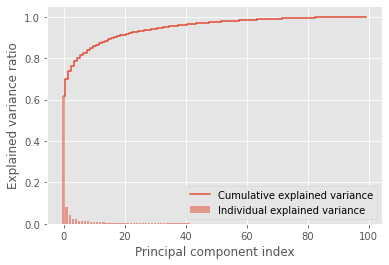

In [8]:
pca = PCA()
X_train_pca = pca.fit_transform(X_2)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()


In [9]:
from sklearn import manifold, decomposition

# 1 - PCA 
print("Dimensions dataset avant réduction PCA : ", X_2.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(X_2)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

# 2 - T-Sne 
from sklearn import manifold, decomposition
tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
#df_tsne["class"] = mData_p1["Category"]
print(df_tsne.shape)

_time_()

Dimensions dataset avant réduction PCA :  (1048, 100)
Dimensions dataset après réduction PCA :  (1048, 71)
(1048, 2)
temps de traitement        5.03 minutes


In [10]:
print( 'TNSE - Texte')
df_tsne

TNSE - Texte


,tsne1,tsne2
0,-2.749500,-47.303238
1,-4.353122,-26.918577
2,-10.603967,-49.480179
3,3.624078,-44.831573
4,-11.343846,-57.593109
...,...,...
1043,-15.264066,-56.015659
1044,-11.480761,-53.720688
1045,-2.882393,21.645700
1046,-4.873415,20.905138


# NON-SuperVisé

# Regroupe Donnée + Target

In [11]:
mLab = pd.DataFrame(mData_p1['labels']) 
X_r = mLab.join(df_tsne)

# Export

In [12]:
X_r.to_csv('X_r.csv', index=False) 

# Point trouvé f(x) des vrais Categories

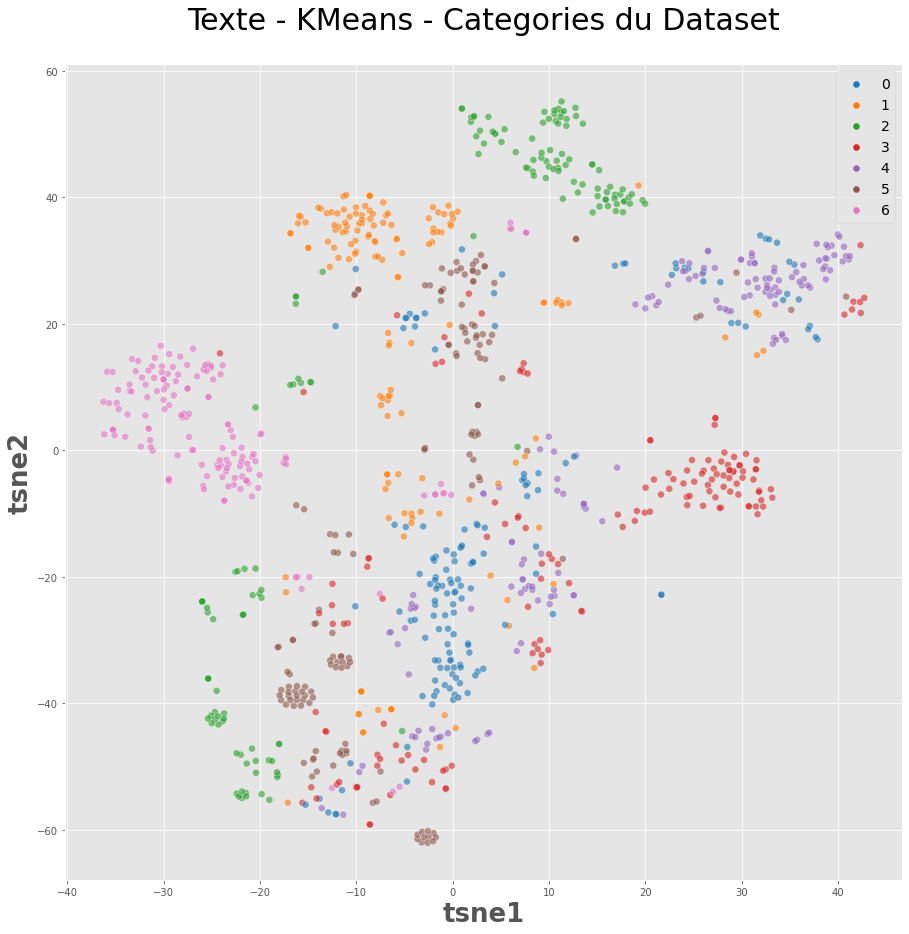

In [13]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="labels", data=X_r, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('Texte - KMeans - Categories du Dataset' , fontsize = 30, pad = 35)
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()


# Graph Cluster Trouvé

In [14]:
from sklearn import cluster, metrics
cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)
X_r["cluster"] = cls.labels_


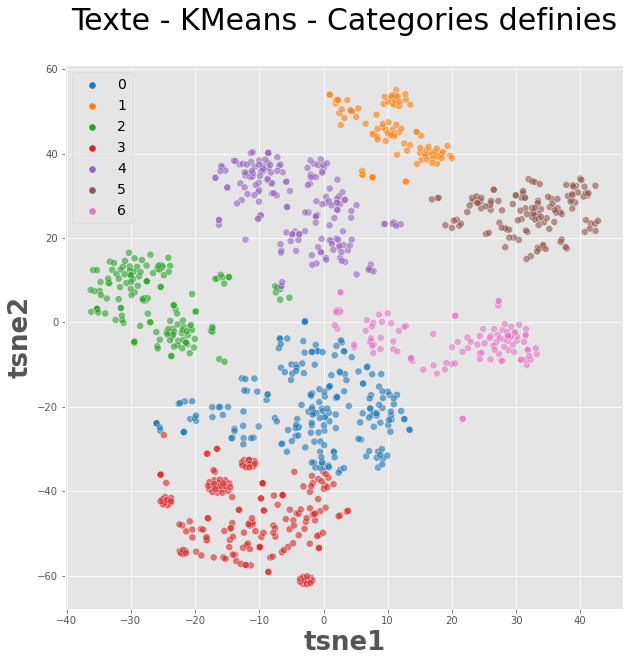

In [15]:
plt.figure(figsize=(10,10))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=X_r,
    legend="brief")

plt.title('Texte - KMeans - Categories definies', fontsize = 30, pad = 35)
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

# Score Classification non-supervisé

In [16]:
print("Kmeans - Accuracy Score -> ",accuracy_score(X_r.cluster, X_r.labels)*100)
print("Kmeans -  ARI : ", metrics.adjusted_rand_score(X_r.cluster, X_r.labels)*100)

Kmeans - Accuracy Score ->  10.877862595419847
Kmeans -  ARI :  28.96456967585716


In [17]:
print("==================================================")
print("Texte - Kmeans - Accuracy -> ",round(accuracy_score(X_r.cluster, X_r.labels)*100))
print("==================================================")

Texte - Kmeans - Accuracy ->  11.0


# Matrice de confusion

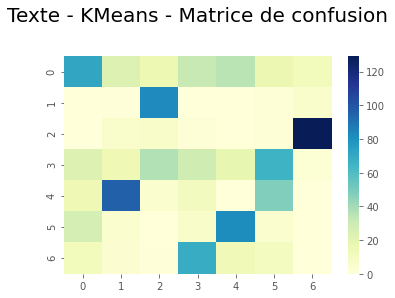

In [18]:
cm = confusion_matrix(X_r.cluster, X_r.labels)
sns.heatmap(cm, cmap="YlGnBu")
plt.title('Texte - KMeans - Matrice de confusion', fontsize = 20, pad = 35)
plt.show()

# SuperVisé

# Naives

In [19]:
#Split
X_train, X_test, y_train, y_test = train_test_split(X_r[['tsne1', 'tsne2']],X_r['labels'], test_size=0.3,random_state=21)


#MinMAx 
from sklearn.preprocessing import MinMaxScaler
X_train_n = MinMaxScaler().fit_transform(X_train)
X_test_n = MinMaxScaler().fit_transform(X_test)

from sklearn import model_selection, naive_bayes, svm

Naive = naive_bayes.MultinomialNB()
Naive.fit(X_train_n ,y_train )
predictions_NB = Naive.predict(X_test)

print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, y_test)*100)

Naive Bayes Accuracy Score ->  28.253968253968253


In [20]:
print("==================================================")
print("Texte - Naive B Accuracy -> ",round(accuracy_score(predictions_NB, y_test)*100))
print("==================================================")

Texte - Naive B Accuracy ->  28.0


In [21]:
# Total pour graph

#MinMAx 
from sklearn.preprocessing import MinMaxScaler
X__n = MinMaxScaler().fit_transform(X_r[['tsne1', 'tsne2']])

from sklearn import model_selection, naive_bayes, svm

Naive = naive_bayes.MultinomialNB()
Naive.fit(X__n ,X_r['labels'] )
predictions_NB = Naive.predict(X__n)

print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, X_r['labels'])*100)




Naive Bayes Accuracy Score ->  38.45419847328244


In [22]:
y_pred_n = pd.DataFrame(predictions_NB)
X_final_n = X_r.join(y_pred_n)
X_final_n  = X_final_n.rename(columns={0: "Naive_class"})
X_final_n

,labels,tsne1,tsne2,cluster,Naive_class
0,4,-2.749500,-47.303238,3,3
1,0,-4.353122,-26.918577,0,4
2,0,-10.603967,-49.480179,3,3
3,4,3.624078,-44.831573,3,3
4,4,-11.343846,-57.593109,3,3
...,...,...,...,...,...
1043,0,-15.264066,-56.015659,3,3
1044,0,-11.480761,-53.720688,3,3
1045,0,-2.882393,21.645700,4,1
1046,0,-4.873415,20.905138,4,1


In [23]:
a = X_final_n.Naive_class
a.value_counts()

3    289
1    222
4    193
6    184
5    160
Name: Naive_class, dtype: int64

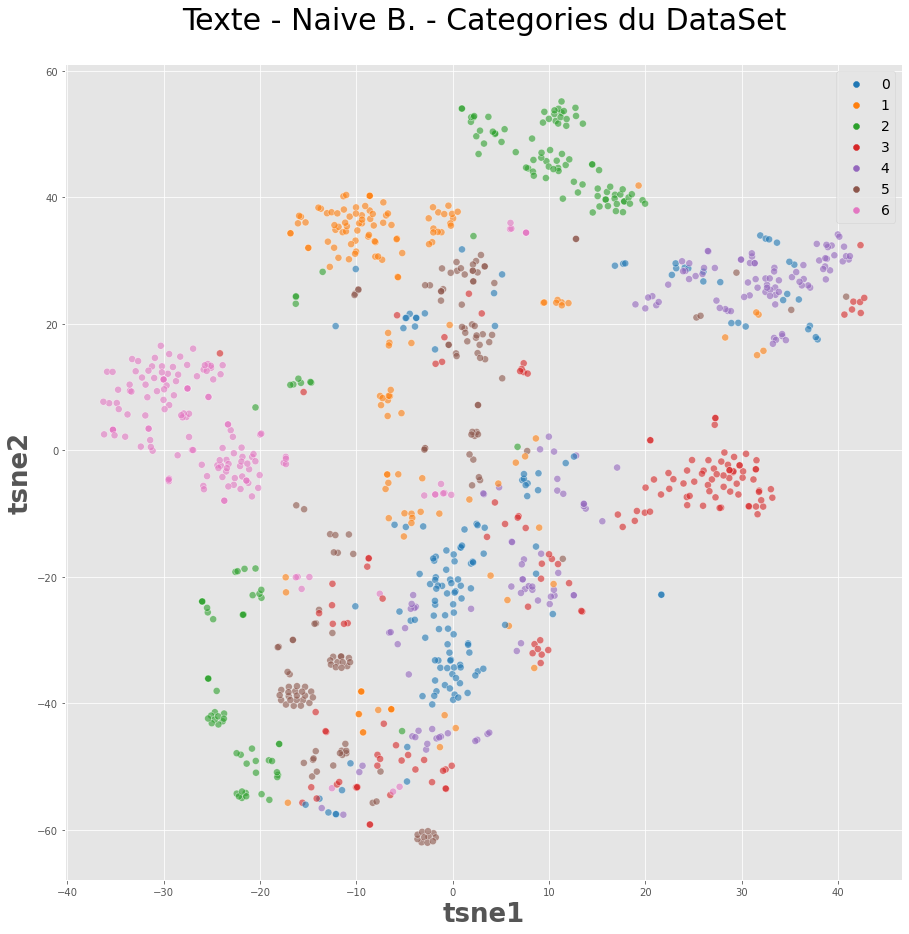

In [24]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="labels", data=X_final_n, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('Texte - Naive B. - Categories du DataSet', fontsize = 30, pad = 35)
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()


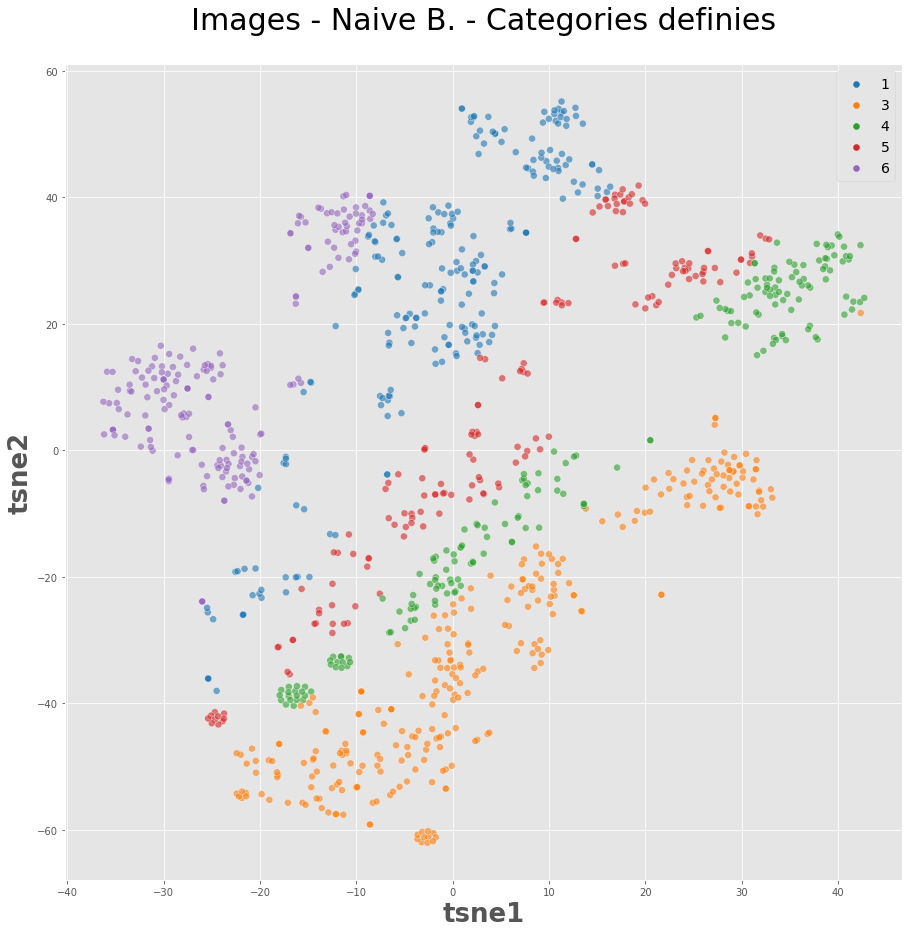

In [25]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="Naive_class", data=X_final_n, legend="brief",
    palette=sns.color_palette('tab10', n_colors=5), s=50, alpha=0.6)

plt.title('Images - Naive B. - Categories definies', fontsize = 30, pad = 35)
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()


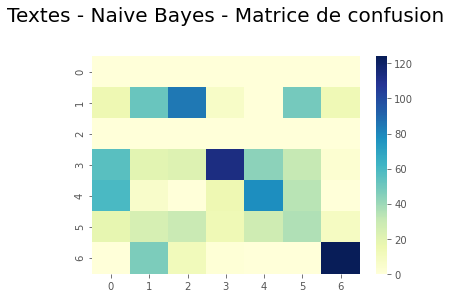

In [26]:
cm = confusion_matrix(X_final_n['Naive_class'], X_final_n['labels'])
sns.heatmap(cm, cmap="YlGnBu")
plt.title('Textes - Naive Bayes - Matrice de confusion', fontsize = 20, pad = 35)
plt.show()

# SVM par defaut

In [27]:
#Split
X_train, X_test, y_train, y_test = train_test_split(X_r[['tsne1', 'tsne2']],X_r['labels'], test_size=0.3,random_state=21)


# W/ default hyperparameters

svc=SVC() 
svc.fit(X_train,y_train)

# predict 
y_pred=svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print("ARI : ", metrics.adjusted_rand_score(y_test,y_pred))

Model accuracy score with default hyperparameters: 0.7143
ARI :  0.472031437909648


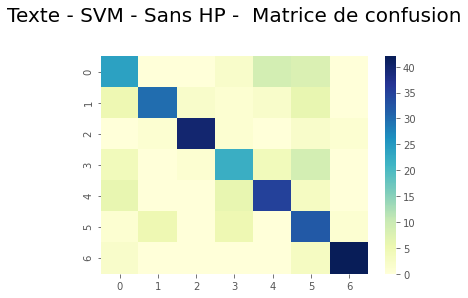

In [28]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap="YlGnBu")
plt.title('Texte - SVM - Sans HP -  Matrice de confusion', fontsize = 20, pad = 35)
plt.show()

# SVM Rechcherche HyperParam

In [29]:
parameters = {'C': [1, 10], 
          'gamma': [0.001, 0.01, 1]}
model = SVC()
grid = GridSearchCV(estimator=model, param_grid=parameters,verbose=2)
grid.fit(X_train,y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...................................C=1, gamma=0.001; total time=   0.0s
[CV] END ...................................C=1, gamma=0.001; total time=   0.0s
[CV] END ...................................C=1, gamma=0.001; total time=   0.0s
[CV] END ...................................C=1, gamma=0.001; total time=   0.0s
[CV] END ...................................C=1, gamma=0.001; total time=   0.0s
[CV] END ....................................C=1, gamma=0.01; total time=   0.0s
[CV] END ....................................C=1, gamma=0.01; total time=   0.0s
[CV] END ....................................C=1, gamma=0.01; total time=   0.0s
[CV] END ....................................C=1, gamma=0.01; total time=   0.0s
[CV] END ....................................C=1, gamma=0.01; total time=   0.0s
[CV] END .......................................C=1, gamma=1; total time=   0.0s
[CV] END .......................................C

# Final Score

In [30]:
X_r

,labels,tsne1,tsne2,cluster
0,4,-2.749500,-47.303238,3
1,0,-4.353122,-26.918577,0
2,0,-10.603967,-49.480179,3
3,4,3.624078,-44.831573,3
4,4,-11.343846,-57.593109,3
...,...,...,...,...
1043,0,-15.264066,-56.015659,3
1044,0,-11.480761,-53.720688,3
1045,0,-2.882393,21.645700,4
1046,0,-4.873415,20.905138,4


In [31]:

#X_train, X_test, y_train, y_test = train_test_split(X_r[['tsne1', 'tsne2']],X_r['labels'], test_size=0.3,random_state=21)

svc=SVC(C=10, gamma=0.01) 
svc.fit(X_r[['tsne1','tsne2']],X_r.labels)

# predict 
y_pred=svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print("ARI : ", metrics.adjusted_rand_score(y_test,y_pred))

Model accuracy score with default hyperparameters: 0.9048
ARI :  0.7960365439246219


In [32]:
print("==================================================")
print("Texte - SVM - Accuracy -> ",round(accuracy_score(y_test, y_pred)*100))
print("==================================================")

Texte - SVM - Accuracy ->  90.0


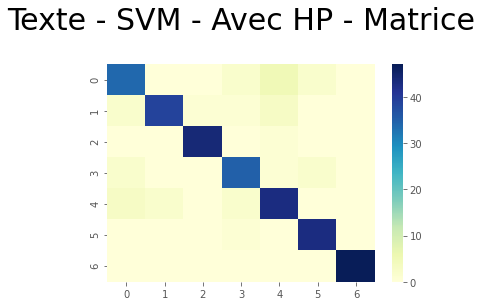

In [33]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap="YlGnBu")
plt.title('Texte - SVM - Avec HP - Matrice', fontsize = 30, pad = 35)
plt.show()

# Preuve en image

In [34]:
svc=SVC(C=10, gamma=0.01) 
svc.fit(X_r[['tsne1', 'tsne2']],X_r['labels'])

# predict 
y_pred=svc.predict(X_r[['tsne1', 'tsne2']])


In [35]:
y_pred = pd.DataFrame(y_pred)
X_final = X_r.join(y_pred)
X_final  = X_final.rename(columns={0: "SVM_class"})
X_final

,labels,tsne1,tsne2,cluster,SVM_class
0,4,-2.749500,-47.303238,3,4
1,0,-4.353122,-26.918577,0,4
2,0,-10.603967,-49.480179,3,5
3,4,3.624078,-44.831573,3,4
4,4,-11.343846,-57.593109,3,0
...,...,...,...,...,...
1043,0,-15.264066,-56.015659,3,0
1044,0,-11.480761,-53.720688,3,3
1045,0,-2.882393,21.645700,4,0
1046,0,-4.873415,20.905138,4,0


# Reel

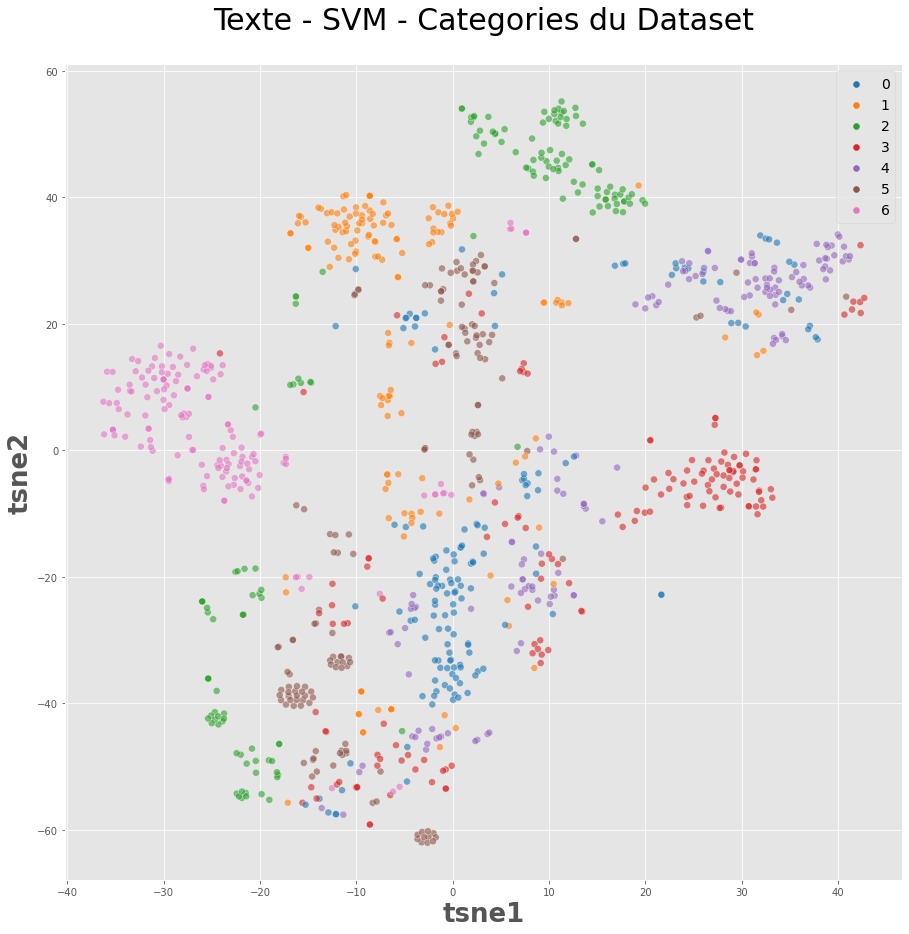

In [36]:

plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="labels", data=X_final, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('Texte - SVM - Categories du Dataset', fontsize = 30, pad = 35)
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()


# Defini

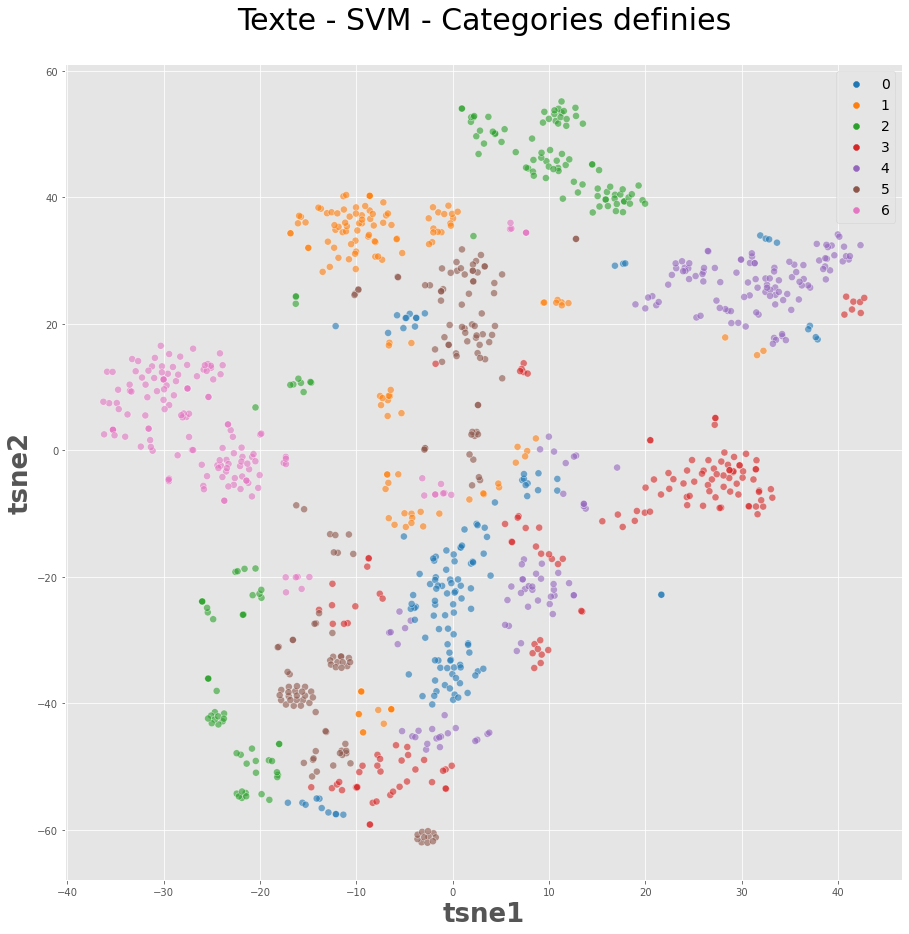

In [37]:


plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne1", y="tsne2", hue='SVM_class', data=X_final, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('Texte - SVM - Categories definies', fontsize = 30, pad = 35)
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()